# Historical Tonnage List API Examples

## Setup
Install the Signal Ocean SDK:
```
pip install signal-ocean
```
And put your API key in a `SIGNAL_OCEAN_API_KEY` environment variable.

## Retrieving a historical tonnage list
First, we need to determine the parameters of the **historical tonnage list** (**HTL**). In order to fetch an HTL, we will need to specify:
- a loading port,
- a vessel class,
- a time frame.

Ports and vessel classes can be retrieved through their corresponding APIs via the `PortAPI` and `VesselClassAPI` classes:

In [1]:
from signal_ocean import PortAPI, VesselClassAPI

port_api = PortAPI()
vessel_class_api = VesselClassAPI()

vessel_class_api.get_vessel_classes()

[VesselClass(id=60, name='VLGCLpg'),
 VesselClass(id=61, name='MidsizeLpg'),
 VesselClass(id=62, name='HandyLpg'),
 VesselClass(id=63, name='SmallLpg'),
 VesselClass(id=69, name='VLOC'),
 VesselClass(id=70, name='Capesize'),
 VesselClass(id=72, name='PostPanamaxDry'),
 VesselClass(id=74, name='PanamaxDry'),
 VesselClass(id=75, name='Supramax'),
 VesselClass(id=76, name='Handymax'),
 VesselClass(id=77, name='Handysize'),
 VesselClass(id=78, name='ULCV'),
 VesselClass(id=79, name='NewPanamaxContainer'),
 VesselClass(id=80, name='PostPanamaxContainer'),
 VesselClass(id=81, name='PanamaxContainer'),
 VesselClass(id=82, name='FeedermaxContainer'),
 VesselClass(id=83, name='FeederContainer'),
 VesselClass(id=84, name='VLCC'),
 VesselClass(id=85, name='Suezmax'),
 VesselClass(id=86, name='Aframax'),
 VesselClass(id=87, name='PanamaxTanker'),
 VesselClass(id=88, name='MR2'),
 VesselClass(id=89, name='MR1'),
 VesselClass(id=90, name='Small'),
 VesselClass(id=91, name='LNGLng'),
 VesselClass(id=

Ports can be looked up by their name using the `PortFilter`:

In [2]:
from signal_ocean import PortFilter

port_api.get_ports(PortFilter(name_like='rot'))

[Port(id=3689, name='Rotterdam'),
 Port(id=6625, name='Rota'),
 Port(id=8920, name='Crotone'),
 Port(id=15617, name='Rarotonga')]

And so can vessel classes with the use of the `VesselClassFilter`:

In [3]:
from signal_ocean import VesselClassFilter

vessel_class_api.get_vessel_classes(VesselClassFilter(name_like='MAX'))

[VesselClass(id=72, name='PostPanamaxDry'),
 VesselClass(id=74, name='PanamaxDry'),
 VesselClass(id=75, name='Supramax'),
 VesselClass(id=76, name='Handymax'),
 VesselClass(id=79, name='NewPanamaxContainer'),
 VesselClass(id=80, name='PostPanamaxContainer'),
 VesselClass(id=81, name='PanamaxContainer'),
 VesselClass(id=82, name='FeedermaxContainer'),
 VesselClass(id=85, name='Suezmax'),
 VesselClass(id=86, name='Aframax'),
 VesselClass(id=87, name='PanamaxTanker')]

Note that the search is case-insensitive and does not require specifying exact names.

We will look for Aframax vessels in Ceyhan, 6 days forward, for the last 90 days:

In [5]:
from datetime import date, timedelta

vessel_class = vessel_class_api.get_vessel_classes(VesselClassFilter(name_like='aframax'))[0]
port = port_api.get_ports(PortFilter(name_like='ceyhan'))[0]
days_forward = 6
today = date.today()
start_date = today - timedelta(days=90)

With the parameters above, we can now call the API:

In [6]:
from signal_ocean.historical_tonnage_list import HistoricalTonnageListAPI

htl_api = HistoricalTonnageListAPI()

htl = htl_api.get_historical_tonnage_list(
    port,
    vessel_class,
    days_forward,
    start_date,
    end_date=today
)

The resulting historical tonnage list is a Python object that contains a collection of tonnage lists, each of which has a timestamp and a collection of vessel data. The tonnage lists are ordered by date in descending order:

In [7]:
todays_tl = htl[0]
print('Date:', todays_tl.date)
print('Vessel count:', len(todays_tl.vessels))
print('Example vessel:', todays_tl.vessels[0])

Date: 2020-07-30 00:00:00+00:00
Vessel count: 52
Example vessel: Vessel(imo=9215050, name='Alboran I', vessel_class='Aframax', ice_class=None, year_built=2001, deadweight=109326, length_overall=244.6, breadth_extreme=42, market_deployment='Spot', push_type='Not Pushed', open_port='Hong Kong', open_date=datetime.datetime(2019, 6, 20, 0, 0, tzinfo=datetime.timezone.utc), operational_status='Laden', commercial_operator='Monte Nero Maritime', commercial_status='Available', eta=datetime.datetime(2019, 7, 15, 0, 0, tzinfo=datetime.timezone.utc), last_fixed=1, latest_ais=datetime.datetime(2019, 6, 13, 0, 0, tzinfo=datetime.timezone.utc), subclass='Dirty', willing_to_switch_subclass=False, open_prediction_accuracy='Port', open_areas=(Area(name='South China', location_taxonomy='Narrow Area'), Area(name='China / Taiwan', location_taxonomy='Wide Area'), Area(name='China', location_taxonomy='Country')), availability_port_type='Source', availability_date_type='Prediction', liquid_capacity=None, fix

The result can also be converted into a Pandas data frame:

In [9]:
data_frame = htl.to_data_frame()
data_frame

name vessel_class ice_class  year_built  \
date       imo                                                          
2020-07-30 9215050       Alboran I      Aframax       NaN        2001   
           9187643          Arnica      Aframax       NaN        2000   
           9038878             Eos      Aframax       NaN        1993   
           9038830          Proteo      Aframax       NaN        1993   
           9165762     Al Marzoqah      Aframax       NaN        1999   
...                            ...          ...       ...         ...   
2020-05-01 9252371         Maratha      Aframax       NaN        2003   
           9315458  Maersk Promise      Aframax       NaN        2006   
           9433597    Orange Stars      Aframax       NaN        2011   
           9296195    Minerva Emma      Aframax       NaN        2003   
           9737395    Stavanger TS      Aframax        1B        2017   

                    deadweight  length_overall  breadth_extreme  \
date       imo                                                    
2020-07-30 9215050      109326          244.60               42   
           9187643       99144          248.00               43   
           9038878       99440          243.97               46   
           9038830       99392          243.97               46   
           9165762      105084          243.56               42   
...                        ...             ...              ...   
2020-05-01 9252371      105995          244.00               42   
           9315458      109647          244.60               42   
           9433597      115756          248.97               44   
           9296195      107197          247.00               42   
           9737395      112700          249.90               44   

                   market_deployment_point_in_time push_type_point_in_time  \
date       imo                                                               
2020-07-30 9215050                            Spot              Not Pushed   
           9187643                        Contract              Not Pushed   
           9038878                           Relet                  Pushed   
           9038830                        Contract              Not Pushed   
           9165762                        Contract              Not Pushed   
...                                            ...                     ...   
2020-05-01 9252371                            Spot                  Pushed   
           9315458                            Spot                  Pushed   
           9433597                         Program             Pushed POSS   
           9296195                            Spot                  Pushed   
           9737395                           Relet                  Pushed   

                   open_port_point_in_time  ...  latest_ais_point_in_time  \
date       imo                              ...                             
2020-07-30 9215050               Hong Kong  ... 2019-06-13 00:00:00+00:00   
           9187643            Bandar Abbas  ... 2019-10-27 00:00:00+00:00   
           9038878                 Bonaire  ... 2020-01-05 00:00:00+00:00   
           9038830                 Bonaire  ... 2020-02-16 00:00:00+00:00   
           9165762                   Dubai  ... 2020-01-23 00:00:00+00:00   
...                                    ...  ...                       ...   
2020-05-01 9252371               Falconara  ... 2020-04-30 00:00:00+00:00   
           9315458                 Sarroch  ... 2020-04-30 00:00:00+00:00   
           9433597                Ashkelon  ... 2020-04-30 00:00:00+00:00   
           9296195                 Trieste  ... 2020-04-30 00:00:00+00:00   
           9737395               Gibraltar  ... 2020-04-30 00:00:00+00:00   

                   subclass open_prediction_accuracy_point_in_time  \
date       imo                                                       
2020-07-30 9215050    Dirty                        

## Example 1 - Plotting a supply trend
The data frame format makes it very easy to generate a supply trend plot.

We'll generate a supply trend from the beginning of the year, but we'll also filter the vessel list by looking for vessels that:
- are pushed,
- have a market deployment type of "Relet" or "Spot",
- their commercial status is available, cancelled or failed,
- are crude oil tankers (their vessel subclass is "Dirty"),
- their AIS information is no older than 5 days.

Filtering can be achieved by creating an instance of a `VesselFilter` and passing it to the `get_historical_tonnage_list` method. A `VesselFilter` meeting the above criteria will look as follows:

In [10]:
from signal_ocean.historical_tonnage_list import VesselFilter, PushType, MarketDeployment, CommercialStatus, VesselSubclass

vessel_filter = VesselFilter(
    push_types=[PushType.PUSHED],
    market_deployments=[MarketDeployment.RELET, MarketDeployment.SPOT],
    commercial_statuses=[CommercialStatus.AVAILABLE, CommercialStatus.CANCELLED, CommercialStatus.FAILED],
    vessel_subclass=VesselSubclass.DIRTY,
    latest_ais_since=5
)

Note the usage of the `PushType`, `MarketDeployment`, `CommercialStatus`, and `VesselSubclass`. These are enum-like classes that contain constants for all the possible values for a given `VesselFilter` parameter. To list the available values for any of the classes, just invoke `list()` on the class:

In [12]:
list(CommercialStatus)

['On Subs', 'Failed', 'Cancelled', 'Available']

You can use these values directly or use a corresponding class member:

In [13]:
CommercialStatus.ON_SUBS == 'On Subs'

True

Let's get the HTL for our filter:

In [14]:
beginning_of_year = date(today.year, 1, 1)

htl_for_supply_trend = htl_api.get_historical_tonnage_list(
    port,
    vessel_class,
    days_forward,
    beginning_of_year,
    end_date=today,
    vessel_filter=vessel_filter
)

supply_trend_data_frame = htl_for_supply_trend.to_data_frame()

supply_trend_data_frame

name vessel_class ice_class  year_built  \
date       imo                                                             
2020-07-30 9291262  Matterhorn Spirit      Aframax        1A        2005   
           9341093          NS Consul      Aframax       NaN        2006   
           9232876     Aegean Freedom      Aframax       NaN        2003   
           9199713            Dynasty      Aframax       NaN        1999   
           9624079         Nordorchid      Aframax       NaN        2013   
...                               ...          ...       ...         ...   
2020-01-01 9276597       Minerva Lisa      Aframax        1C        2004   
           9319686     Maersk Pelican      Aframax       NaN        2008   
           9298650           Amalthea      Aframax       NaN        2006   
           9414503      Yamato Spirit      Aframax       NaN        2008   
           9439539            Sea Bay      Aframax       NaN        2009   

                    deadweight  length_overall  breadth_extreme  \
date       imo                                                    
2020-07-30 9291262      114834          253.50               44   
           9341093      110000          244.00               42   
           9232876      106074          244.00               42   
           9199713      106644          240.50               42   
           9624079      104280          228.60               42   
...                        ...             ...              ...   
2020-01-01 9276597      103755          243.57               42   
           9319686      109647          244.60               42   
           9298650      107115          248.00               43   
           9414503      107617          243.80               42   
           9439539      108760          243.00               42   

                   market_deployment_point_in_time push_type_point_in_time  \
date       imo                                                               
2020-07-30 9291262                            Spot                  Pushed   
           9341093                            Spot                  Pushed   
           9232876                            Spot                  Pushed   
           9199713                            Spot                  Pushed   
           9624079                           Relet                  Pushed   
...                                            ...                     ...   
2020-01-01 9276597                            Spot                  Pushed   
           9319686                            Spot                  Pushed   
           9298650                            Spot                  Pushed   
           9414503                            Spot                  Pushed   
           9439539                           Relet                  Pushed   

                   open_port_point_in_time  ...  latest_ais_point_in_time  \
date       imo                              ...                             
2020-07-30 9291262              Vatika Bay  ... 2020-07-29 00:00:00+00:00   
           9341093                 Piraeus  ... 2020-07-29 00:00:00+00:00   
           9232876               Canakkale  ... 2020-07-29 00:00:00+00:00   
           9199713              Vatika Bay  ... 2020-07-29 00:00:00+00:00   
           9624079                 Augusta  ... 2020-07-29 00:00:00+00:00   
...                                    ...  ...                       ...   
2020-01-01 9276597                     Fos  ... 2019-12-31 00:00:00+00:00   
           9319686                     Fos  ... 2019-12-31 00:00:00+00:00   
           9298650                 Trieste  ... 2019-12-31 00:00:00+00:00   
           9414503                 Trieste  ... 2019-12-31 00:00:00+00:00   
           9439539               Gibraltar  ... 2019-12-31 00:00:00+00:00   

                   subclass open_prediction_accuracy_point_in_time  \
date       imo                                                       
2020-07-30 9291

Now, we can generate the plot:

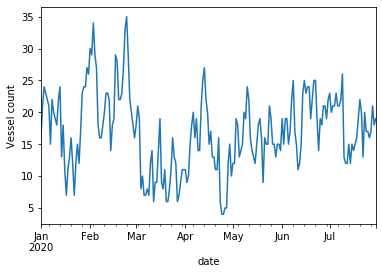

In [15]:
from signal_ocean.historical_tonnage_list import IndexLevel

supply_trend = supply_trend_data_frame.groupby(IndexLevel.DATE, sort=True).size()
plot = supply_trend.plot()
plot.set_ylabel('Vessel count')

plot

## Example 2 - Generating an Excel sheet
The data frame can be easily saved as an Excel file by using Pandas's built-in `to_excel()` function.

Before we do that, we need to remove all the time zone information from all the timestamps in the data frame. This is because Excel does not support storing time zone information along with timestamps. However, Signal Ocean's SDK always provides time zone information to make all timestamp-based computation unambiguous.

In [16]:
from signal_ocean.historical_tonnage_list import Column

without_time_zones = (
    supply_trend_data_frame
        .reset_index()
        .astype({ Column.OPEN_DATE: 'datetime64[ns]', Column.ETA: 'datetime64[ns]', Column.LATEST_AIS: 'datetime64[ns]'})
        .set_index([IndexLevel.DATE, IndexLevel.IMO])
 )

Now, we can generate the Excel file:

In [17]:
without_time_zones.to_excel('htl.xlsx')